In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bethel us
port elizabeth za
butaritari ki
kapaa us
nizhneyansk ru
santa paula us
hermanus za
arraial do cabo br
coquimbo cl
pisco pe
galgani sd
port alfred za
stoyba ru
mataura pf
almeria es
semey kz
hobart au
gat ly
shingu jp
barrow us
new norfolk au
rocha uy
llandrindod wells gb
hobyo so
college us
vaini to
luderitz na
vrangel ru
ushuaia ar
hermanus za
eureka us
gazanjyk tm
tasiilaq gl
ulagan ru
lata sb
nelson bay au
mataura pf
pevek ru
saint-philippe re
lompoc us
rapid valley us
caravelas br
vaitupu wf
kodinsk ru
faanui pf
khatanga ru
viedma ar
tungor ru
pevek ru
atuona pf
alpena us
bluff nz
smithers ca
kodiak us
porbandar in
odweyne so
ulaangom mn
caucasia co
hithadhoo mv
sao joao da barra br
rikitea pf
ribeira grande pt
edd er
bol td
saskylakh ru
olinda br
belushya guba ru
kulhudhuffushi mv
rikitea pf
illoqqortoormiut gl
rikitea pf
albany au
narsaq gl
palabuhanratu id
tasiilaq gl
ribeira grande pt
port hardy ca
griffith au
yellowknife ca
roald no
belvedere marittimo it
coihaique c

moyo ug
bardiyah ly
margate za
hobart au
vaini to
punta arenas cl
karaul ru
cape town za
nguiu au
mataura pf
tongliao cn
kuche cn
lorengau pg
mataura pf
husavik is
mys shmidta ru
mataura pf
san lawrenz mt
kodiak us
saint-joseph re
port alfred za
rikitea pf
ushuaia ar
bengkulu id
ushuaia ar
svetlogorsk ru
tiksi ru
broome au
kahului us
taolanaro mg
graaff-reinet za
rikitea pf
mataura pf
upernavik gl
bredasdorp za
mataura pf
summerland ca
punta arenas cl
rikitea pf
ponta do sol cv
illoqqortoormiut gl
nikolskoye ru
wanaka nz
vila franca do campo pt
fairbanks us
busselton au
samusu ws
saskylakh ru
la grande us
ushuaia ar
jamestown sh
vaini to
east london za
longyearbyen sj
berlevag no
ushuaia ar
gasa bt
sao joao da barra br
conakry gn
alyangula au
albany au
busselton au
sentyabrskiy ru
mataura pf
bluff nz
dikson ru
qaanaaq gl
moyo ug
sao filipe cv
kimbe pg
punta arenas cl
lebu cl
saskylakh ru
barentsburg sj
busselton au
beringovskiy ru
cidreira br
mataura pf
ponta do sol cv
taolanaro mg
meu

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | bethel
Processing Record 2 of Set 12 | port elizabeth
Processing Record 3 of Set 12 | butaritari
Processing Record 4 of Set 12 | kapaa
Processing Record 5 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 12 | santa paula
Processing Record 7 of Set 12 | hermanus
Processing Record 8 of Set 12 | arraial do cabo
Processing Record 9 of Set 12 | coquimbo
Processing Record 10 of Set 12 | pisco
Processing Record 11 of Set 12 | galgani
City not found. Skipping...
Processing Record 12 of Set 12 | port alfred
Processing Record 13 of Set 12 | stoyba
City not found. Skipping...
Processing Record 14 of Set 12 | mataura
Processing Record 15 of Set 12 | almeria
Processing Record 16 of Set 12 | semey
Processing Record 17 of Set 12 | hobart
Processing Record 18 of Set 12 | gat
Processing Record 19 of Set 12 | shingu
Processing Record 20 of Set 12 | barrow
Processing Record 21 of Set 12 | new norfolk
Processing Record 22 of Set 12 | rocha
Proc

Processing Record 38 of Set 15 | tuktoyaktuk
Processing Record 39 of Set 15 | mandalgovi
Processing Record 40 of Set 15 | xichang
Processing Record 41 of Set 15 | santa fe
Processing Record 42 of Set 15 | hami
Processing Record 43 of Set 15 | geraldton
Processing Record 44 of Set 15 | cartagena del chaira
Processing Record 45 of Set 15 | bengkulu
Processing Record 46 of Set 15 | manzhouli
Processing Record 47 of Set 15 | grand gaube
Processing Record 48 of Set 15 | balancan
Processing Record 49 of Set 15 | bichura
Processing Record 50 of Set 15 | ponta do sol
Processing Record 1 of Set 16 | bilma
Processing Record 2 of Set 16 | klaksvik
Processing Record 3 of Set 16 | amderma
City not found. Skipping...
Processing Record 4 of Set 16 | ostrovnoy
Processing Record 5 of Set 16 | porgera
Processing Record 6 of Set 16 | nhlangano
Processing Record 7 of Set 16 | mayo
Processing Record 8 of Set 16 | labuhan
Processing Record 9 of Set 16 | tual
Processing Record 10 of Set 16 | chicama
Processi

Processing Record 27 of Set 19 | port hedland
Processing Record 28 of Set 19 | asyut
Processing Record 29 of Set 19 | ishigaki
Processing Record 30 of Set 19 | sur
Processing Record 31 of Set 19 | devils lake
Processing Record 32 of Set 19 | pahrump
Processing Record 33 of Set 19 | vikhorevka
Processing Record 34 of Set 19 | normandin
Processing Record 35 of Set 19 | belyy yar
Processing Record 36 of Set 19 | nishihara
Processing Record 37 of Set 19 | warqla
City not found. Skipping...
Processing Record 38 of Set 19 | zhigansk
Processing Record 39 of Set 19 | cam ranh
Processing Record 40 of Set 19 | maniitsoq
Processing Record 41 of Set 19 | esso
Processing Record 42 of Set 19 | labutta
City not found. Skipping...
Processing Record 43 of Set 19 | leh
Processing Record 44 of Set 19 | luganville
Processing Record 45 of Set 19 | kavarna
Processing Record 46 of Set 19 | dunedin
Processing Record 47 of Set 19 | salym
Processing Record 48 of Set 19 | miri
Processing Record 49 of Set 19 | mo

Processing Record 8 of Set 23 | labytnangi
Processing Record 9 of Set 23 | muros
Processing Record 10 of Set 23 | agutaya
Processing Record 11 of Set 23 | dongying
Processing Record 12 of Set 23 | pacifica
Processing Record 13 of Set 23 | ialibu
Processing Record 14 of Set 23 | albion
Processing Record 15 of Set 23 | marawi
Processing Record 16 of Set 23 | yaring
Processing Record 17 of Set 23 | ghanzi
Processing Record 18 of Set 23 | ambilobe
Processing Record 19 of Set 23 | nagamangala
Processing Record 20 of Set 23 | brokopondo
Processing Record 21 of Set 23 | tombouctou
Processing Record 22 of Set 23 | ningan
City not found. Skipping...
Processing Record 23 of Set 23 | pokhara
Processing Record 24 of Set 23 | lethem
Processing Record 25 of Set 23 | mana
Processing Record 26 of Set 23 | skjervoy
Processing Record 27 of Set 23 | leo
Processing Record 28 of Set 23 | ziro
Processing Record 29 of Set 23 | ijaki
City not found. Skipping...
Processing Record 30 of Set 23 | cavalcante
Proc

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,41.94,69,0,0.00,US,2022-04-03 04:05:14
1,Port Elizabeth,-33.9180,25.5701,65.10,99,100,4.00,ZA,2022-04-03 04:08:13
2,Butaritari,3.0707,172.7902,81.93,77,25,15.79,KI,2022-04-03 04:08:14
3,Kapaa,22.0752,-159.3190,80.58,93,75,21.85,US,2022-04-03 04:08:14
4,Santa Paula,34.3542,-119.0593,60.24,80,100,4.61,US,2022-04-03 04:04:25
5,Hermanus,-34.4187,19.2345,57.79,85,15,10.18,ZA,2022-04-03 04:08:15
6,Arraial Do Cabo,-22.9661,-42.0278,76.19,88,98,10.02,BR,2022-04-03 04:08:15
7,Coquimbo,-29.9533,-71.3436,53.33,93,20,3.44,CL,2022-04-03 04:08:16
8,Pisco,-13.7000,-76.2167,66.25,82,82,6.91,PE,2022-04-03 04:08:16
9,Port Alfred,-33.5906,26.8910,64.18,96,100,5.01,ZA,2022-04-03 04:05:07


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-04-03 04:05:14,41.3712,-73.4140,41.94,69,0,0.00
1,Port Elizabeth,ZA,2022-04-03 04:08:13,-33.9180,25.5701,65.10,99,100,4.00
2,Butaritari,KI,2022-04-03 04:08:14,3.0707,172.7902,81.93,77,25,15.79
3,Kapaa,US,2022-04-03 04:08:14,22.0752,-159.3190,80.58,93,75,21.85
4,Santa Paula,US,2022-04-03 04:04:25,34.3542,-119.0593,60.24,80,100,4.61
5,Hermanus,ZA,2022-04-03 04:08:15,-34.4187,19.2345,57.79,85,15,10.18
6,Arraial Do Cabo,BR,2022-04-03 04:08:15,-22.9661,-42.0278,76.19,88,98,10.02
7,Coquimbo,CL,2022-04-03 04:08:16,-29.9533,-71.3436,53.33,93,20,3.44
8,Pisco,PE,2022-04-03 04:08:16,-13.7000,-76.2167,66.25,82,82,6.91
9,Port Alfred,ZA,2022-04-03 04:05:07,-33.5906,26.8910,64.18,96,100,5.01


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

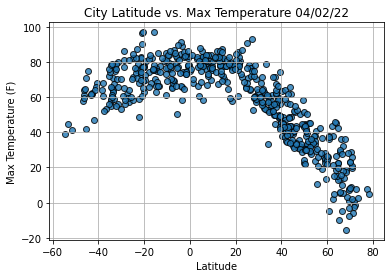

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

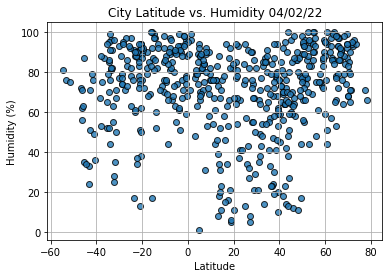

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

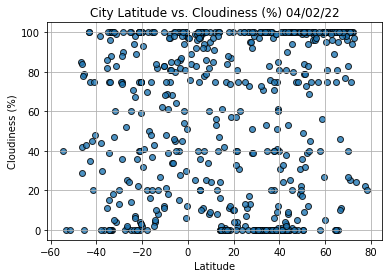

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

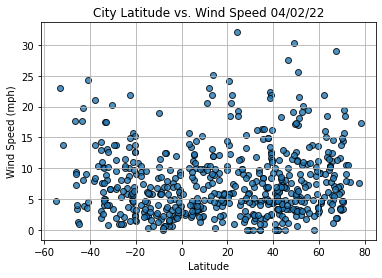

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

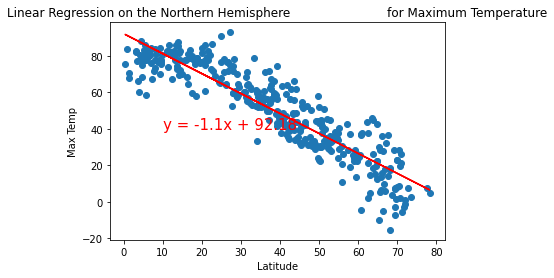

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

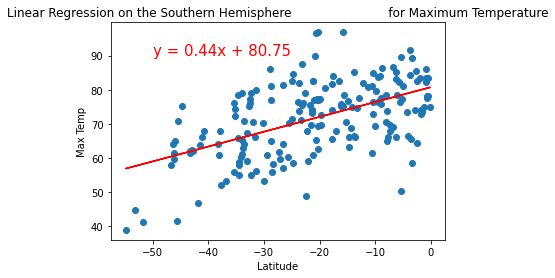

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

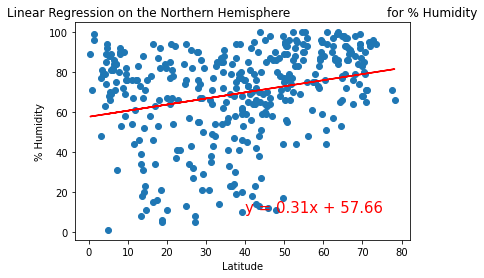

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

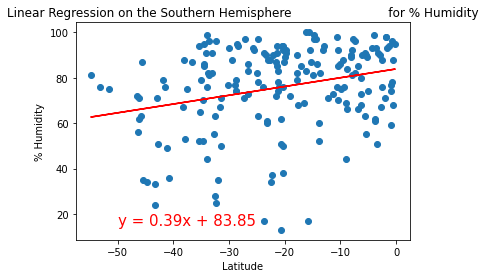

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

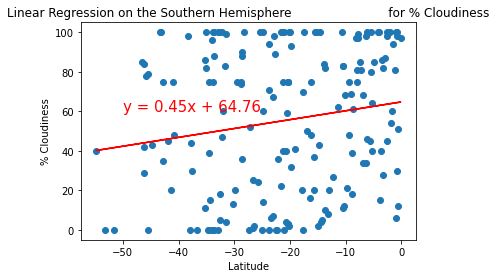

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

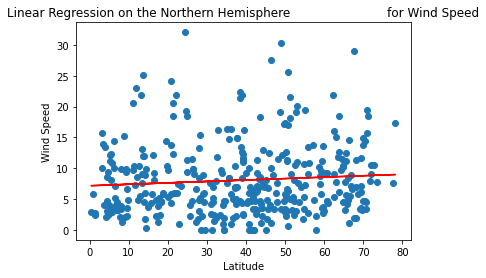

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

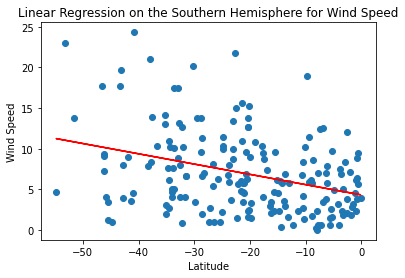

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))